In [ ]:
# Now time for model 2:

In [ ]:
import keras,os
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
import tensorflow as tf

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Import the libraries
import zipfile
import os

zip_ref = zipfile.ZipFile('/content/drive/MyDrive/train.zip', 'r') #Opens the zip file in read mode
zip_ref.extractall('/tmp') #Extracts the files into the /tmp folder
zip_ref.close()

In [ ]:
len(os.listdir('/tmp/train/Category_1'))

#Results
#25000

3026

In [ ]:
zip_ref = zipfile.ZipFile('/content/drive/MyDrive/test.zip', 'r') #Opens the zip file in read mode
zip_ref.extractall('/tmp') #Extracts the files into the /tmp folder
zip_ref.close()

In [ ]:
len(os.listdir('/tmp/train/Category_2'))

1027

In [ ]:
trdata = ImageDataGenerator()
traindata = trdata.flow_from_directory(directory="/tmp/train",target_size=(224,224))
tsdata = ImageDataGenerator()
testdata = tsdata.flow_from_directory(directory="/tmp/test",target_size=(224,224))

Found 4760 images belonging to 3 classes.
Found 1208 images belonging to 3 classes.


In [ ]:
# Creating a CNN from scratch:

In [ ]:
from tensorflow.keras.layers.experimental.preprocessing import Resizing
model = Sequential()
model.add(keras.Input(shape=(None,None,3)))
model.add(Resizing(224,224))
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(224, 224, 3)))
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPool2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPool2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPool2D((2, 2)))

In [ ]:
model.add(Flatten())
model.add(Dense(128,activation="relu"))
model.add(Dense(units=3, activation="softmax"))

In [ ]:
# compile model
opt = tf.keras.optimizers.Adam(lr=0.001)
model.compile(optimizer=opt, loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resizing (Resizing)          (None, 224, 224, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 224, 224, 32)      896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 224, 224, 32)      9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 112, 112, 64)      18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 112, 112, 64)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 64)        0

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
checkpoint = ModelCheckpoint('/content/gdrive/MyDrive/capstone3_checkpoint2.h5',monitor='val_accuracy', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
early = EarlyStopping(monitor='val_accuracy', min_delta=0, patience=20, verbose=1, mode='auto')
hist = model.fit_generator(steps_per_epoch=100,generator=traindata, validation_data= testdata, validation_steps=10,epochs=100,callbacks=[checkpoint,early])
model.save('/content/gdrive/MyDrive/capstone3_model2.h5')
print("Saved model 2 to disk.")

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/100
100/100 [==============================] - 146s 1s/step - loss: 160.0250 - accuracy: 0.6902 - val_loss: 0.6832 - val_accuracy: 0.7031

Epoch 00001: val_accuracy improved from -inf to 0.70312, saving model to /content/gdrive/MyDrive/capstone3_checkpoint2.h5
Epoch 2/100
100/100 [==============================] - 116s 1s/step - loss: 0.5213 - accuracy: 0.7794 - val_loss: 0.6908 - val_accuracy: 0.7000

Epoch 00002: val_accuracy did not improve from 0.70312
Epoch 3/100
100/100 [==============================] - 116s 1s/step - loss: 0.4907 - accuracy: 0.8011 - val_loss: 0.7742 - val_accuracy: 0.7125

Epoch 00003: val_accuracy improved from 0.70312 to 0.71250, saving model to /content/gdrive/MyDrive/capstone3_checkpoint2.h5
Epoch 4/100
100/100 [==============================] - 117s 1s/step - loss: 0.3783 - accuracy: 0.8440 - val_loss: 0.6648 - val_accuracy: 0.7469

Epoch 00004: val_accuracy improved from 0.71250 to 0.74687, saving model to /content/gdrive/MyDrive/capstone3_checkp

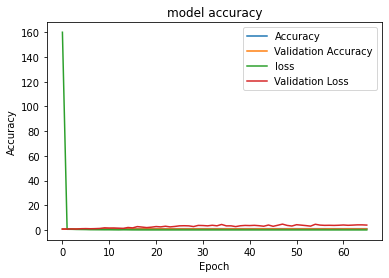

In [ ]:
import matplotlib.pyplot as plt
plt.plot(hist.history["accuracy"])
plt.plot(hist.history['val_accuracy'])
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy","loss","Validation Loss"])
plt.show()

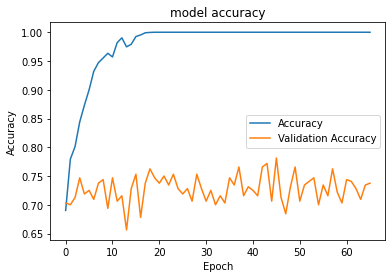

In [ ]:
import matplotlib.pyplot as plt
plt.plot(hist.history["accuracy"])
plt.plot(hist.history['val_accuracy'])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy"])
plt.show()

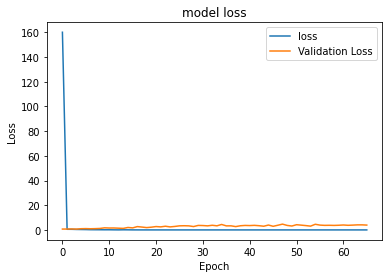

In [ ]:
import matplotlib.pyplot as plt
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title("model loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["loss","Validation Loss"])
plt.show()